**Método de Otsu**

Utiliza um limiar global escolhido de forma automática para realizar a segmentação da imagem.

Utiliza um histograma para tanto, o histograma conta a frequência dos pixels na imagem.

O método leva em conta que será gerado um histograma bimodal, onde de um lado contém os pixels do objeto e do outro os pixels do fundo da imagem. O valor escolhido encontra-se no meio dos histogramas.

Este método funciona melhor em imagens bimodais que tem duas distribuições de pixels diferentes.

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

from google.colab.patches import cv2_imshow

from google.colab import drive

drive.mount('/content/gdrive')

!cp -R /content/gdrive/MyDrive/Mestrado/Cursos\ -\ Udemy/Segmentação\ de\ imagens/Segmentação\ Imagens\ Python\ AZ/imagens imagens/ 

Mounted at /content/gdrive


In [10]:
def mostrar_imagem(imagem):
  fig = plt.gcf() # Limpa as configurações do gráfico
  fig.set_size_inches(18, 6)
  plt.imshow(imagem, cmap='gray')
  plt.axis('off')
  plt.show()

In [8]:
img = cv2.imread('/content/imagens/paisagem01.jpg')
imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
imgCinza = cv2.cvtColor(imgRGB, cv2.COLOR_BGR2GRAY)

In [9]:
valor, otsu = cv2.threshold(imgCinza, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU) # Utilizando o Otsu
print('Limiar: ', valor)

Limiar:  136.0


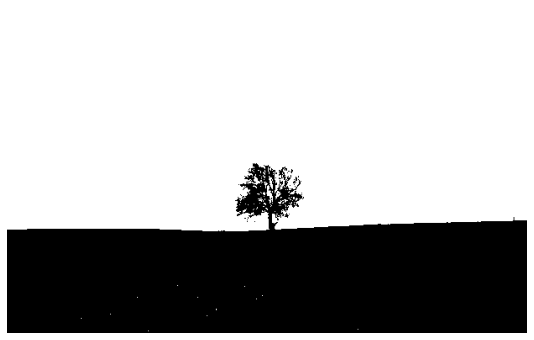

In [12]:
mostrar_imagem(otsu)

**Histograma**

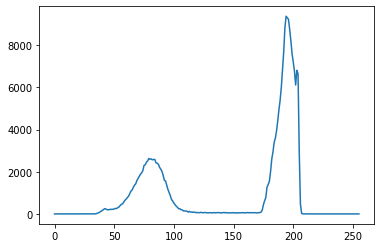

In [13]:
histograma, bins = np.histogram(imgCinza, 256, [0,256])
plt.plot(histograma);

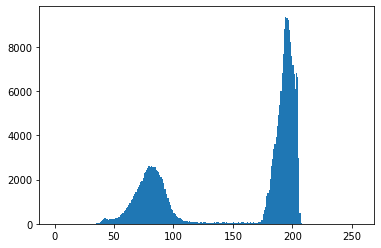

In [15]:
plt.hist(imgCinza.ravel() # Transforma uma matriz em um vetor
          , 256, [0, 256]);

**Imagens com ruído**

Para contornar o problema é necessário filtrar a imagem.

Aplicar funções de pré-processamento pode ajudar a melhorar a qualidade da segmentação.

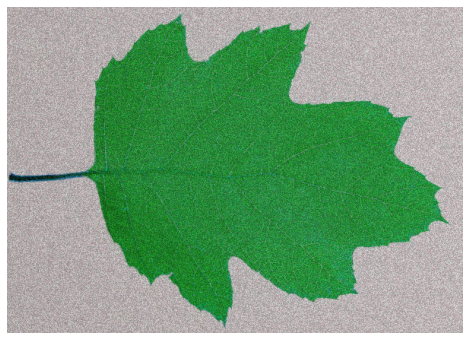

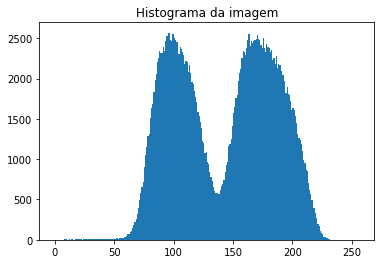

In [21]:
img = cv2.imread('/content/imagens/folha_ruido.jpg')
imgCinza = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
mostrar_imagem(img)
plt.hist(imgCinza.ravel(), 256, [0, 256])
plt.title('Histograma da imagem')
plt.show()

Limiar:  139.0


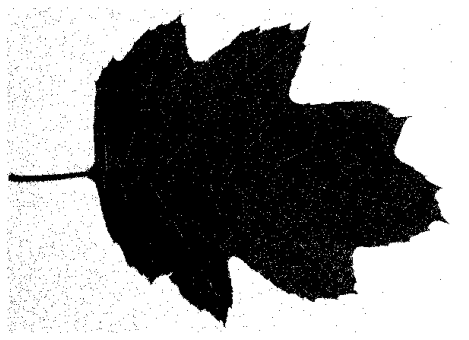

In [22]:
valor, otsu = cv2.threshold(imgCinza, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU) # Utilizando o Otsu
print('Limiar: ', valor)
mostrar_imagem(otsu)

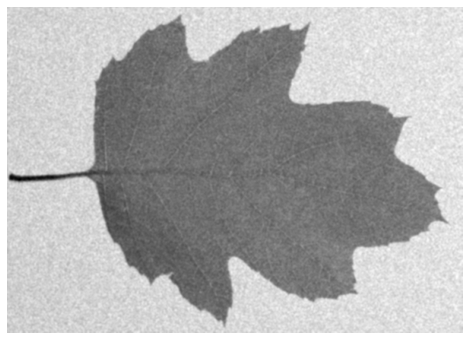

In [23]:
# Aplicando o filtro de desfoque Gaussiano
desfoque = cv2.GaussianBlur(imgCinza, (5,5), 0)
mostrar_imagem(desfoque)

Limiar:  139.0


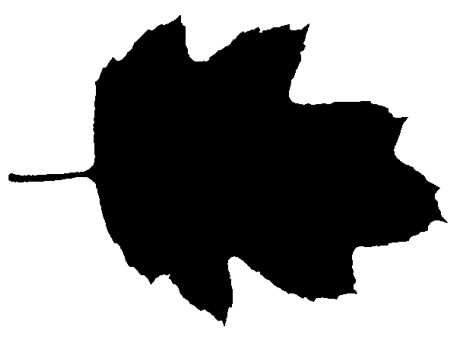

In [24]:
valor, otsu = cv2.threshold(desfoque, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU) # Utilizando o Otsu
print('Limiar: ', valor)
mostrar_imagem(otsu)

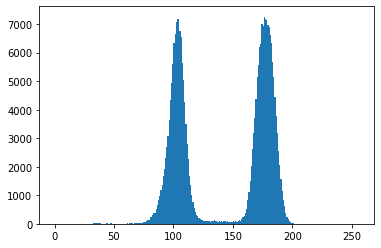

In [26]:
plt.hist(desfoque.ravel(), 256, [0, 256]);